Name: Haris Zahid

Student#: 500845895

Cites:

1.   https://www.youtube.com/watch?v=6_2hzRopPbQ&ab_channel=NicholasRenotte
2.   https://www.projectpro.io/recipes/build-simple-neural-network-tensorflow

https://medium.com/analytics-vidhya/coding-a-neural-network-for-xor-logic-classifier-from-scratch-b90543648e8a



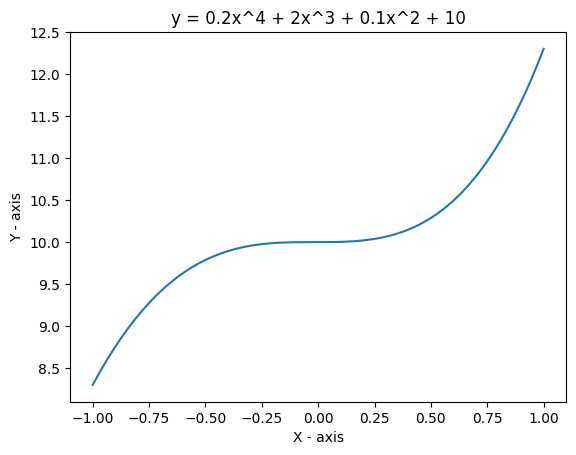

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras

def create_data():
  x = np.linspace(-1, 1, num=30000)
  y = []
  for i in range(len(x)):
    y.append((0.2*x[i]**4) + (2*x[i]**3) + (0.1*x[i]**2) + 10)
  return x,y

x,y = create_data()
plt.plot(x, y)
plt.xlabel('X - axis')
plt.ylabel('Y - axis')
plt.title('y = 0.2x^4 + 2x^3 + 0.1x^2 + 10')
plt.show()

def shuffle(arg):
  x,y = create_data()
  dataset = np.column_stack((x, y))
  if arg=='shuffle':
    np.random.shuffle(dataset)
  return dataset

def data_part(dataset,train_size,val_size,test_size):
  trainAmount = int((train_size/100)*(len(dataset)))
  train_set = dataset[:trainAmount]

  valAmount = int((val_size/100)*(len(dataset)))
  val_set = dataset[trainAmount:trainAmount+valAmount]

  testAmount = int((test_size/100)*(len(dataset)))
  test_set = dataset[trainAmount+valAmount:len(dataset)]

  return train_set,val_set,test_set

def scale(dataset):
  scaler = MinMaxScaler()
  return scaler.fit_transform(dataset)

def error_metrics(y_true, y_pred):
  mae = np.mean(np.abs(y_true - y_pred))
  mse = np.mean((y_true - y_pred)**2)
  rmse = np.sqrt(mse)
  SSR = 0
  SST = 0
  mean_data = np.mean(y_true)

  for i in range(len(y_pred)):
    SSR += (y_pred[i] - mean_data)**2

  for i in range(len(y_true)):
    SST += (y_true[i] - y_pred[i])**2
  r2 = 1-(SST/SSR)
  return mae, mse, rmse, r2

def build_model(structure, activation):
    model = keras.models.Sequential()
    if structure == 1:
        model.add(tf.keras.layers.Dense(12, activation=activation, input_shape=(1,)))
        model.add(tf.keras.layers.Dense(8, activation=activation))
        model.add(tf.keras.layers.Dense(4, activation=activation))
    elif structure == 2:
        model.add(tf.keras.layers.Dense(24, activation=activation, input_shape=(1,)))
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss='mse', optimizer='adam')
    return model

def run_case(case, shuffle_data_flag, activation, structure):
    print(f"Case {case}:")
    print(f"Shuffled: {shuffle_data_flag}, Activation: {activation}, Structure: {structure}")

    data = shuffle(shuffle_data_flag)
    training_set, validation_set, testing_set = data_part(data,30,20,50)

    training_x, training_y = training_set.T
    val_x, val_y = validation_set.T
    testing_x, testing_y = testing_set.T

    model = build_model(structure, activation)
    model.fit(training_x, training_y, epochs=20, batch_size=12, validation_data=(val_x, val_y), validation_batch_size=12)
    prediction = model.predict(testing_x)

    plt.scatter(testing_x, testing_y, label='Actual')
    plt.xlabel('x_test')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'Case {case}: Actual')
    plt.show()

    plt.scatter(testing_x, prediction, label='Predicted', color='Orange')
    plt.xlabel('x_test')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'Case {case}: Predicted')
    plt.show()

    mae, mse, rmse, r2 = error_metrics(testing_y, prediction)
    print(f"MAE: {mae}\nMSE: {mse}\nRMSE: {rmse}\nR2 Score: {r2}")

Case 1:
Shuffled: shuffle, Activation: relu, Structure: 1
Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 31.2324 - val_loss: 0.2104
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.1069 - val_loss: 0.0575
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0466 - val_loss: 0.0444
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0438 - val_loss: 0.0478
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0440 - val_loss: 0.0441
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0444 - val_loss: 0.0459
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0446 - val_loss: 0.0440
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0447 - val_loss: 0.0472
Epoch 9/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0450 - val_loss: 0.0450
Epoch 10/20
750/750 [====================

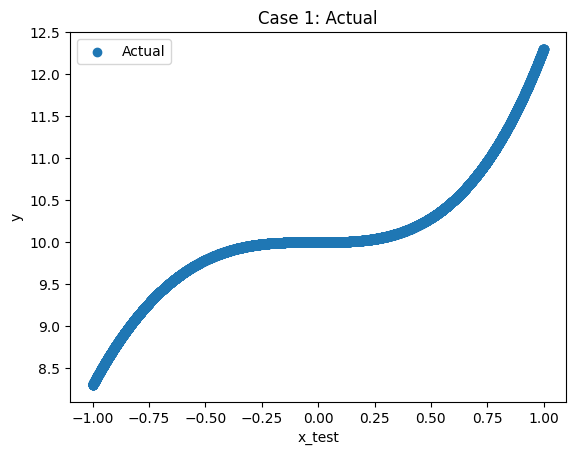

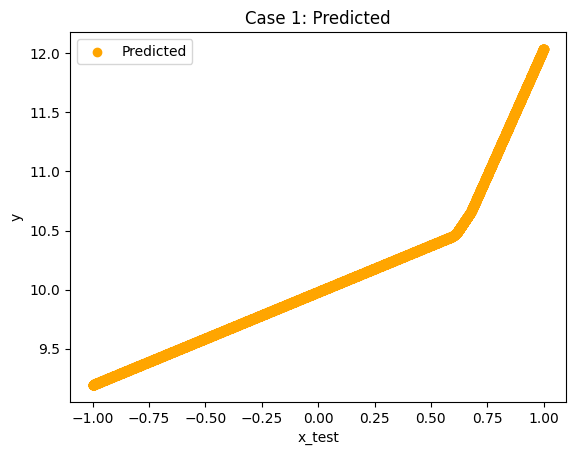

MAE: 0.7790230525266673
MSE: 1.0341716634189198
RMSE: 1.0169423107624738
R2 Score: [0.89506614]
Case 2:
Shuffled: shuffle, Activation: relu, Structure: 2
Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 35.0251 - val_loss: 0.1492
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0812 - val_loss: 0.0709
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0622 - val_loss: 0.0558
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0497 - val_loss: 0.0462
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0425 - val_loss: 0.0404
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0364 - val_loss: 0.0336
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0288 - val_loss: 0.0256
Epoch 8/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0193 - val_loss: 0.0151
Epoch 9/20
750/750 [=========================

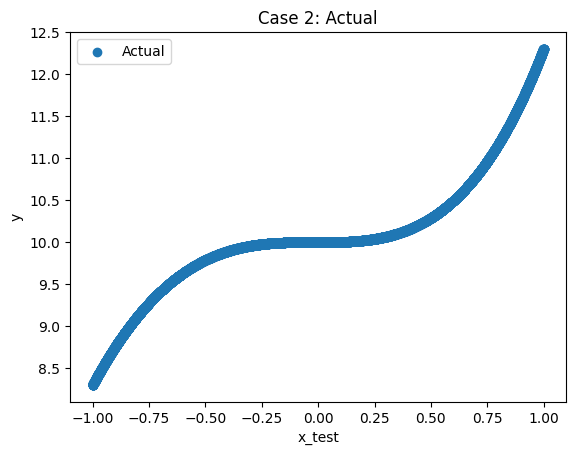

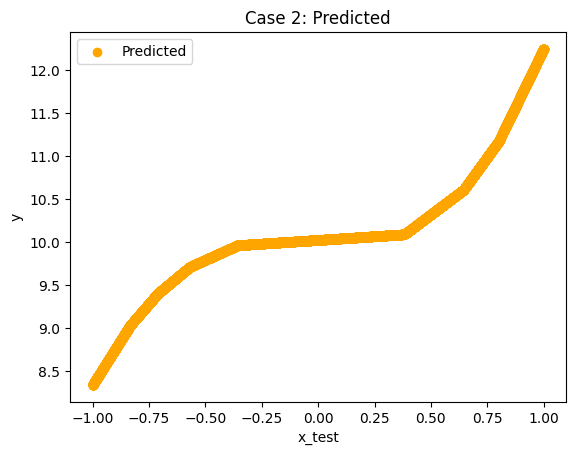

MAE: 0.7990311023807528
MSE: 1.1529297595563854
RMSE: 1.073745668003548
R2 Score: [0.998951]
Case 3:
Shuffled: shuffle, Activation: tanh, Structure: 1
Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 45.2852 - val_loss: 20.5164
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 11.1196 - val_loss: 4.6624
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 2.3489 - val_loss: 0.9909
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.7239 - val_loss: 0.5861
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.5856 - val_loss: 0.5649
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3479 - val_loss: 0.2473
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2251 - val_loss: 0.1875
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1768 - val_loss: 0.1554
Epoch 9/20
750/750 [==========================

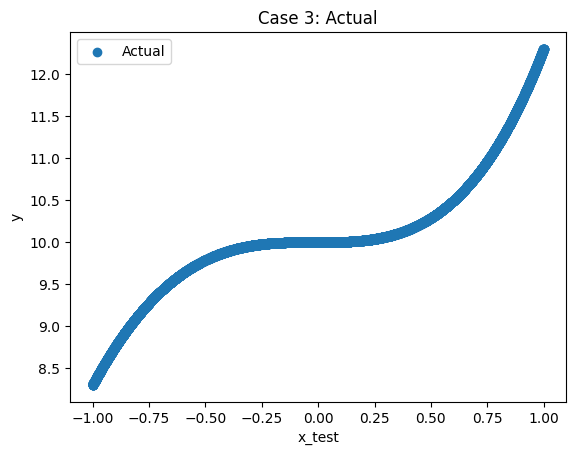

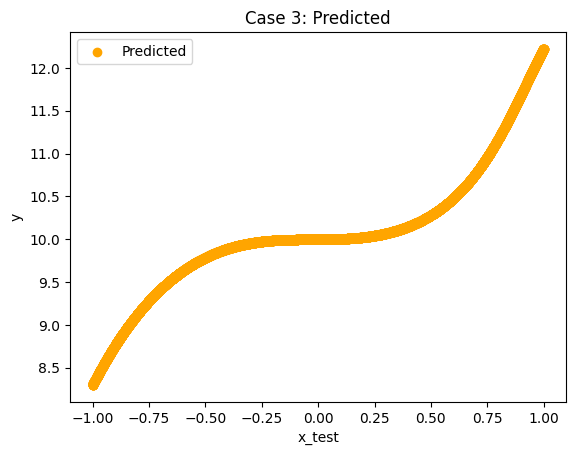

MAE: 0.7954779921397223
MSE: 1.1439077260997519
RMSE: 1.0695362200971745
R2 Score: [0.9998475]
Case 4:
Shuffled: shuffle, Activation: relu, Structure: 1
Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 19.8299 - val_loss: 0.1460
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0774 - val_loss: 0.0356
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0186 - val_loss: 0.0088
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0047 - val_loss: 0.0028
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 9/20
750/750 [==========================

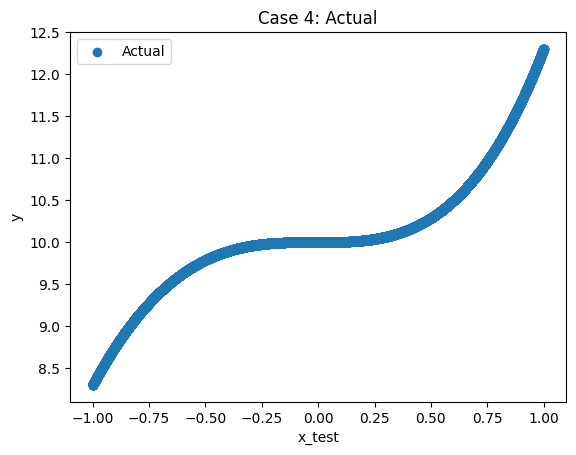

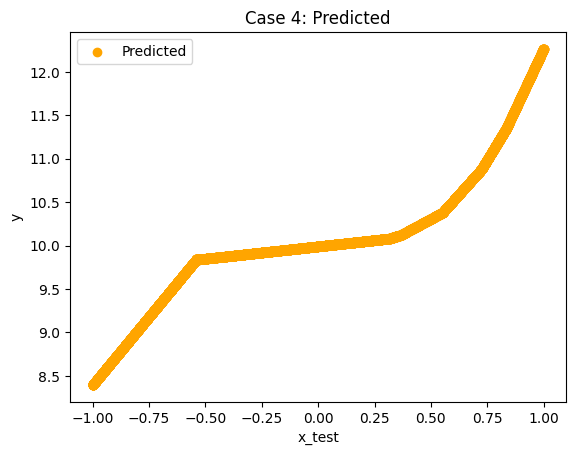

MAE: 0.8188915986274748
MSE: 1.195680999667828
RMSE: 1.093471993087993
R2 Score: [0.996848]
Case 5:
Shuffled: shuffle, Activation: tanh, Structure: 1
Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 42.4094 - val_loss: 18.2902
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 9.5926 - val_loss: 3.9418
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 1.9412 - val_loss: 0.8901
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.6705 - val_loss: 0.5935
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.5773 - val_loss: 0.5752
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3490 - val_loss: 0.2484
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1958 - val_loss: 0.1640
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1240 - val_loss: 0.0749
Epoch 9/20
750/750 [============================

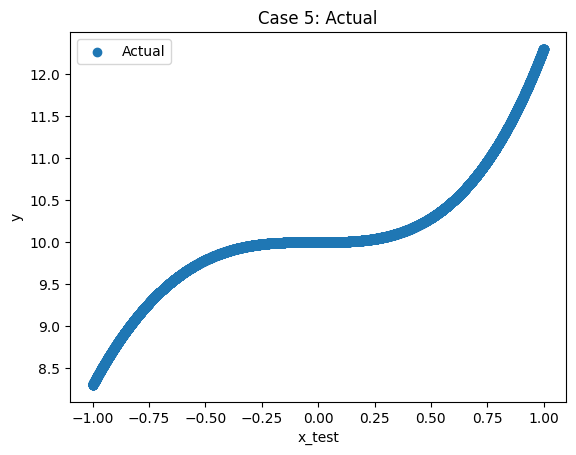

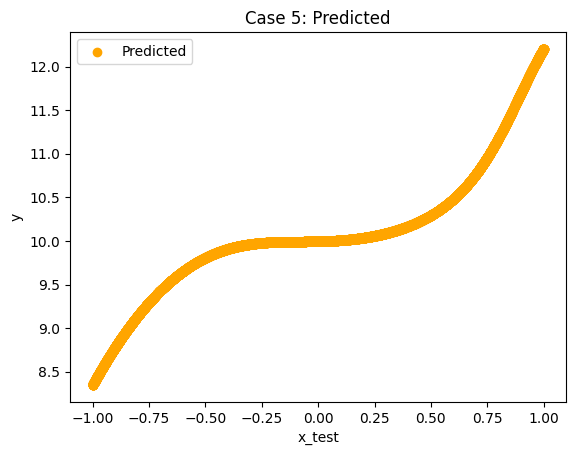

MAE: 0.7926758277377383
MSE: 1.1355669989504236
RMSE: 1.065629860200259
R2 Score: [0.99933875]
Case 1:
Shuffled: notshuffle, Activation: relu, Structure: 1
Epoch 1/20
750/750 [==============================] - 4s 3ms/step - loss: 30.4534 - val_loss: 13.7833
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 1.7079 - val_loss: 7.7083
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.8788 - val_loss: 1.4345
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0455 - val_loss: 0.0340
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0019 - val_loss: 0.0140
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0012 - val_loss: 0.0069
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 8.9559e-04 - val_loss: 6.1359e-04
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 7.4617e-04 - val_loss: 6.8613e-04
Epoch 9/20
750/750 [======

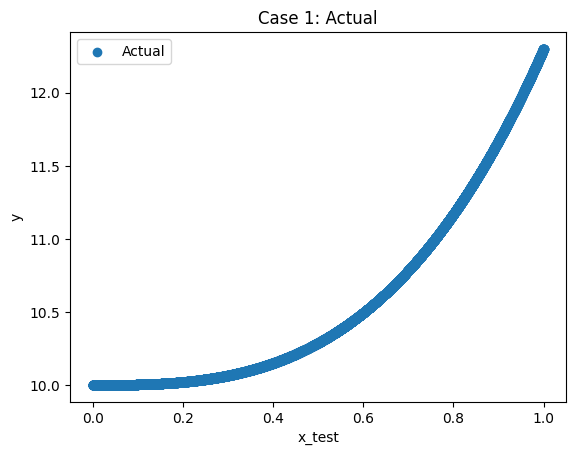

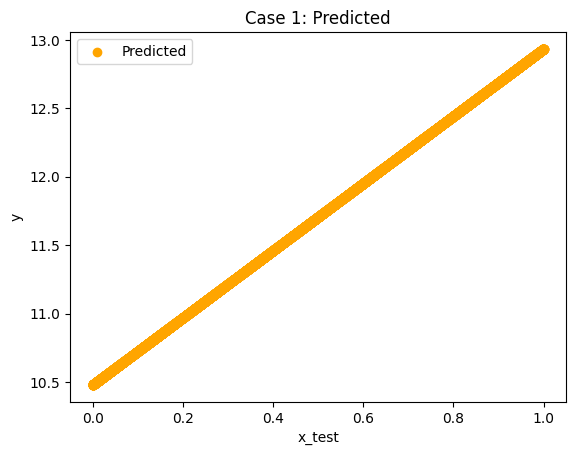

MAE: 1.2731061512707895
MSE: 2.20822330246241
RMSE: 1.4860091865336533
R2 Score: [0.23620796]
Case 2:
Shuffled: notshuffle, Activation: relu, Structure: 2
Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 29.8051 - val_loss: 16.2847
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 2.0124 - val_loss: 11.8592
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 1.5810 - val_loss: 8.3669
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 1.0474 - val_loss: 4.8157
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4703 - val_loss: 1.8370
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1062 - val_loss: 0.4787
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0150 - val_loss: 0.2339
Epoch 8/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0069 - val_loss: 0.2696
Epoch 9/20
750/750 [======================

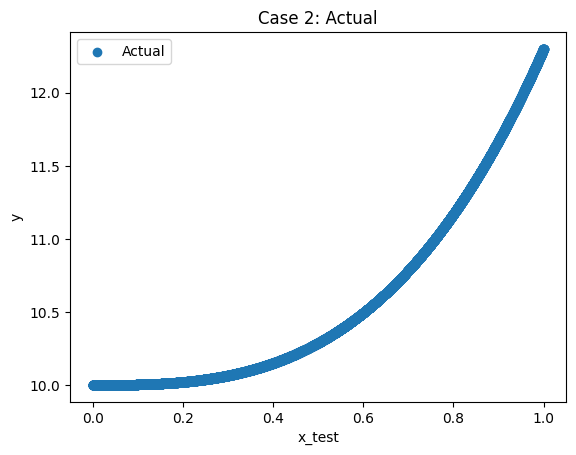

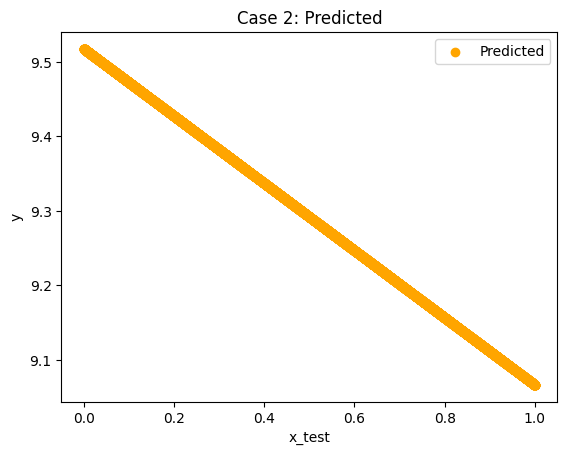

MAE: 1.2814233285517835
MSE: 2.080610792951735
RMSE: 1.4424322489987995
R2 Score: [-0.3474592]
Case 3:
Shuffled: notshuffle, Activation: tanh, Structure: 1
Epoch 1/20
750/750 [==============================] - 4s 4ms/step - loss: 34.3315 - val_loss: 19.8295
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 6.9966 - val_loss: 4.8244
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 1.0684 - val_loss: 1.1631
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2554 - val_loss: 0.5391
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2138 - val_loss: 0.4643
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2133 - val_loss: 0.4511
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2132 - val_loss: 0.4638
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2131 - val_loss: 0.4449
Epoch 9/20
750/750 [======================

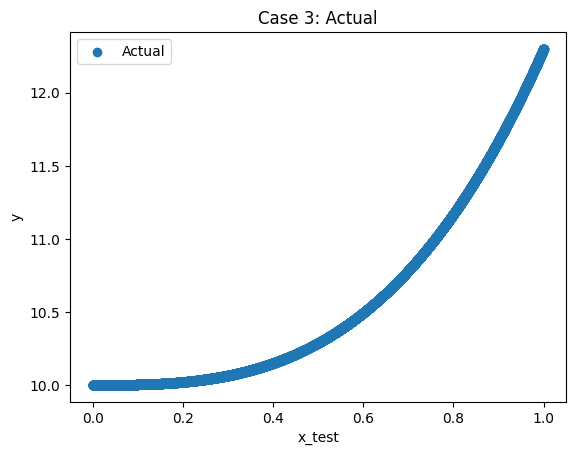

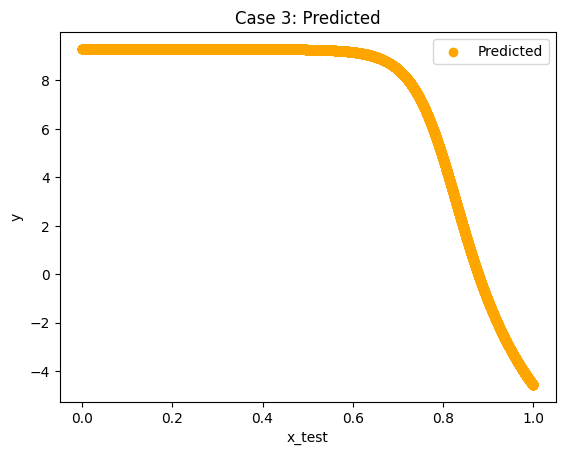

MAE: 3.5390166593085977
MSE: 29.796961599836973
RMSE: 5.4586593225660245
R2 Score: [-0.18503678]
Case 4:
Shuffled: notshuffle, Activation: relu, Structure: 1
Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 16.4431 - val_loss: 15.9437
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 1.8839 - val_loss: 10.0952
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 1.1200 - val_loss: 3.9793
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4828 - val_loss: 0.8498
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0579 - val_loss: 0.0126
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0014 - val_loss: 0.0065
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 5.0188e-04 - val_loss: 0.0047
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 4.1270e-04 - val_loss: 0.0034
Epoch 9/20
750/750 [===========

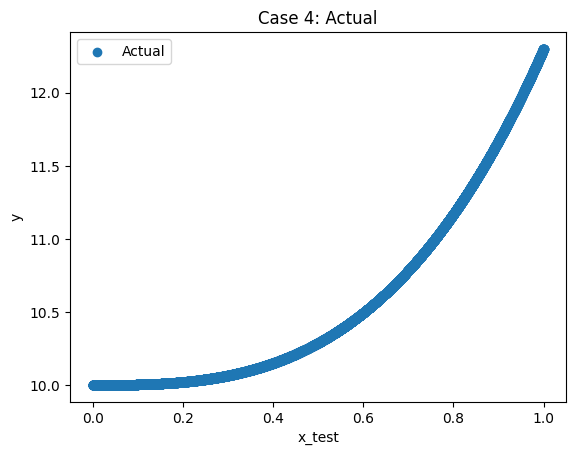

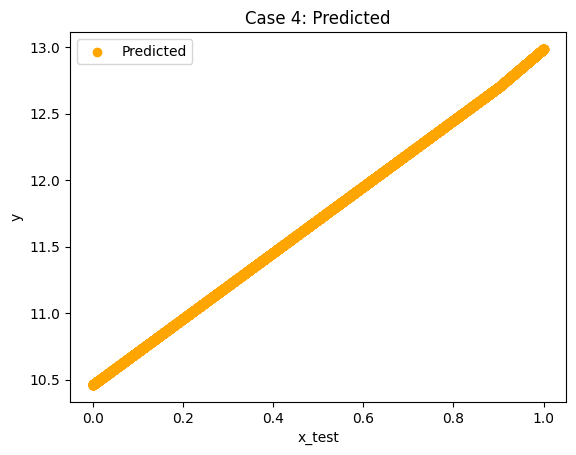

MAE: 1.2751553730989094
MSE: 2.223913475857257
RMSE: 1.4912791408241641
R2 Score: [0.24336433]
Case 5:
Shuffled: notshuffle, Activation: tanh, Structure: 1
Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 38.5103 - val_loss: 21.9465
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 8.0504 - val_loss: 5.5117
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 1.2880 - val_loss: 1.3109
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2732 - val_loss: 0.5590
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2142 - val_loss: 0.4758
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2132 - val_loss: 0.4608
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2131 - val_loss: 0.4720
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2131 - val_loss: 0.4625
Epoch 9/20
750/750 [======================

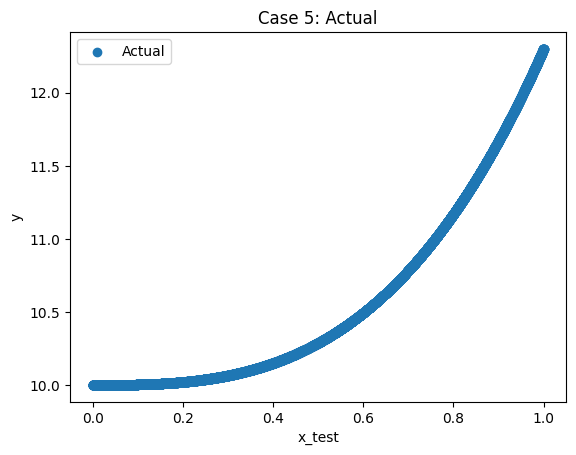

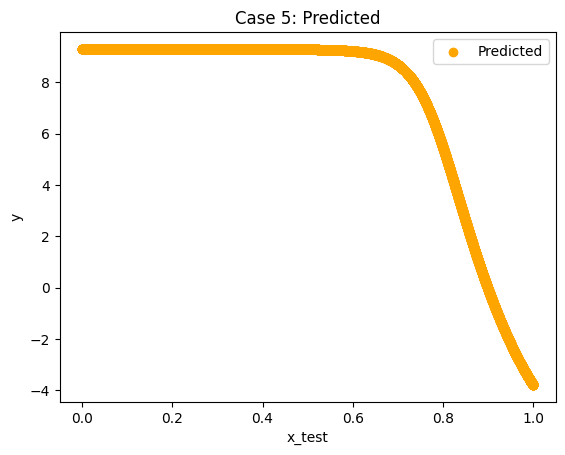

MAE: 3.292978472233939
MSE: 25.428028219464764
RMSE: 5.042621165571013
R2 Score: [-0.1994375]


In [ ]:
for shuffle_data_flag in ["shuffle", "notshuffle"]:
    run_case(1, shuffle_data_flag, 'relu', 1)
    run_case(2, shuffle_data_flag, 'relu', 2)
    run_case(3, shuffle_data_flag, 'tanh', 1)
    run_case(4, shuffle_data_flag, 'relu', 1)
    run_case(5, shuffle_data_flag, 'tanh', 1)

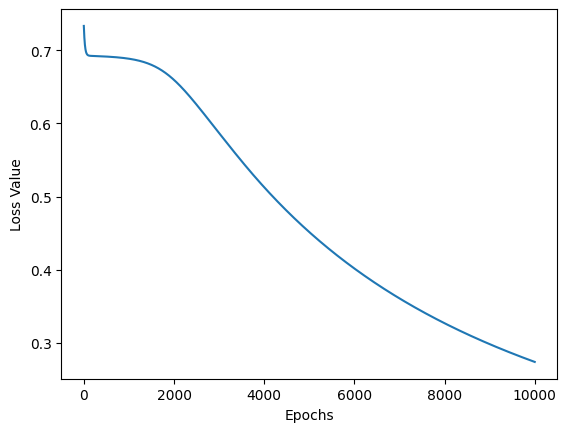

For input 0, 0, output = 0
For input 0, 1, output = 1
For input 1, 0, output = 1
For input 1, 1, output = 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
y = np.array([[0, 1, 1, 0]])

n_inputs = 2
n_outputs = 1
n_hidden = 2
n_samples = x.shape[1]

learning_rate = 0.1

# Random weight initialization
w_hidden = np.random.rand(n_hidden, n_inputs)
w_output = np.random.rand(n_outputs, n_hidden)

losses = []

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_propagation(w_hidden, w_output, x):
    z_hidden = np.dot(w_hidden, x)
    a_hidden = sigmoid(z_hidden)
    z_output = np.dot(w_output, a_hidden)
    a_output = sigmoid(z_output)
    return z_hidden, a_hidden, z_output, a_output

def backward_propagation(n_samples, w_hidden, w_output, z_hidden, a_hidden, z_output, a_output, y):
    delta_output = a_output - y
    delta_w_output = np.dot(delta_output, a_hidden.T) / n_samples
    delta_hidden = np.dot(w_output.T, delta_output) * a_hidden * (1 - a_hidden)
    delta_w_hidden = np.dot(delta_hidden, x.T) / n_samples
    delta_w_hidden = np.reshape(delta_w_hidden, w_hidden.shape)
    delta_w_output = np.reshape(delta_w_output, w_output.shape)
    return delta_output, delta_w_output, delta_hidden, delta_w_hidden

n_iterations = 10000
for i in range(n_iterations):
    z_hidden, a_hidden, z_output, a_output = forward_propagation(w_hidden, w_output, x)
    loss = -(1 / n_samples) * np.sum(y * np.log(a_output) + (1 - y) * np.log(1 - a_output))
    losses.append(loss)
    delta_output, delta_w_output, delta_hidden, delta_w_hidden = backward_propagation(n_samples, w_hidden, w_output, z_hidden, a_hidden, z_output, a_output, y)
    w_output -= learning_rate * delta_w_output
    w_hidden -= learning_rate * delta_w_hidden

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.show()

def predict_xor(w_hidden, w_output, input_data):
    _, _, _, a_output = forward_propagation(w_hidden, w_output, input_data)
    a_output = np.squeeze(a_output)
    result = 1 if a_output >= 0.5 else 0
    print(f"For input {int(input_data[0])}, {int(input_data[1])}, output = {result}")

predict_xor(w_hidden, w_output, np.array([[0], [0]]))
predict_xor(w_hidden, w_output, np.array([[0], [1]]))
predict_xor(w_hidden, w_output, np.array([[1], [0]]))
predict_xor(w_hidden, w_output, np.array([[1], [1]]))